### Importing Libaries

In [1]:
#!pip install numpy==1.16.4

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle
import sklearn
import scipy

import seaborn as sns
sns.set()

---

### Data

In [2]:
data = pd.read_csv('./diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.shape

(768, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


---

### EDA

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


**Histogram Plot**

C:\Users\AKASH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


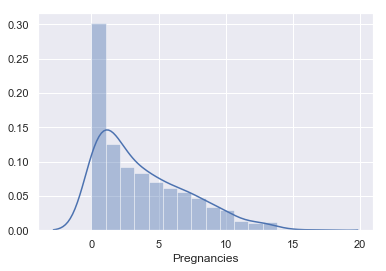

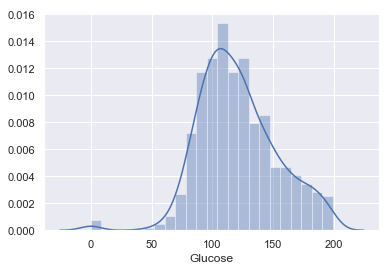

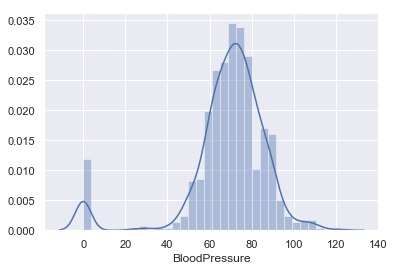

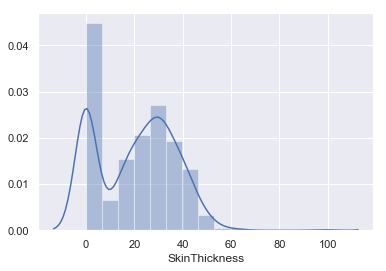

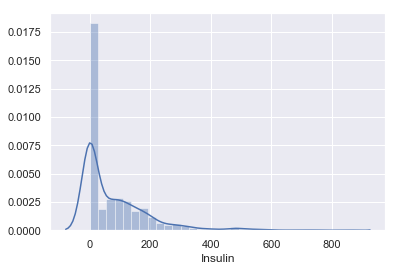

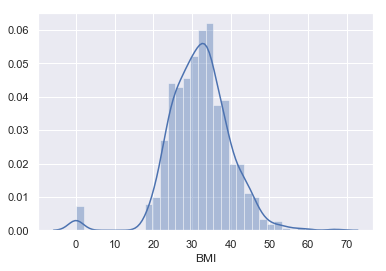

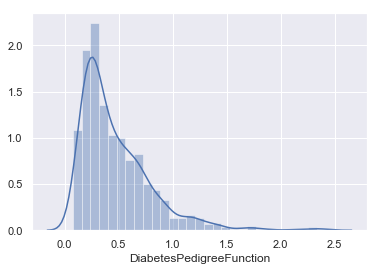

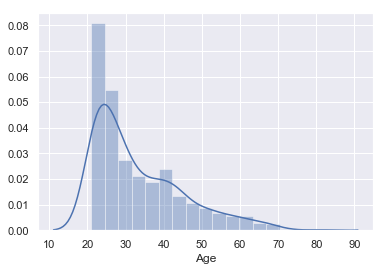

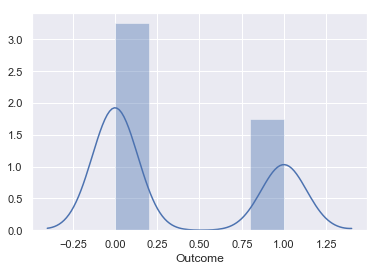

In [8]:
data_feature = data.columns

for feature in data_feature:
    p = sns.distplot(a = data[feature])
    plt.show()

**Removal of Zeros**\
\
Since there are many zeros in data and values of 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI' cannot be zero,
Therefore, Converriting Zeros into NaN value

In [3]:
data_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [4]:
data[data_zeros] = np.where((data[data_zeros] == 0), np.nan, data[data_zeros])

In [5]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

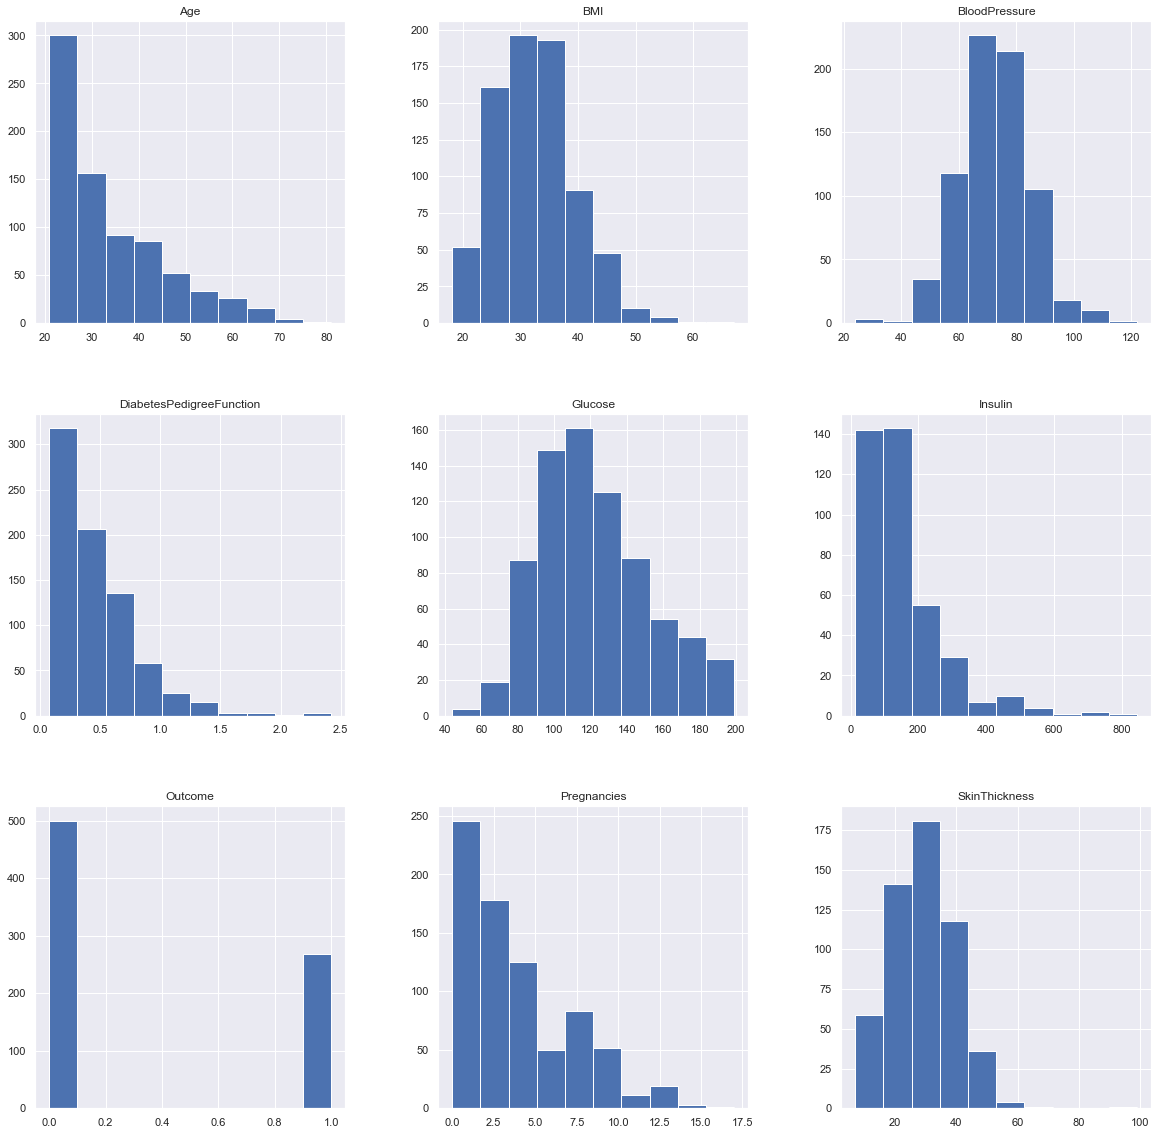

In [12]:
# for feature in data_feature:
#     plt.hist(data[feature])
#     plt.show()
p = data.hist(figsize = (20,20))

**Handling Missing Values**\
\
Filling NaN values with suitable mean and median values

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,763.0,121.686763,30.535641,44.000,99.00000,117.0000,141.00000,199.00
BloodPressure,733.0,72.405184,12.382158,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,541.0,29.153420,10.476982,7.000,22.00000,29.0000,36.00000,99.00
Insulin,394.0,155.548223,118.775855,14.000,76.25000,125.0000,190.00000,846.00
BMI,757.0,32.457464,6.924988,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
data['Glucose'] = data['Glucose'].fillna(data['Glucose'].mean())
# data.isnull().sum()

In [7]:
data['BloodPressure'] = data['BloodPressure'].fillna(data['BloodPressure'].mean())
# data.isnull().sum()

<AxesSubplot:ylabel='SkinThickness'>

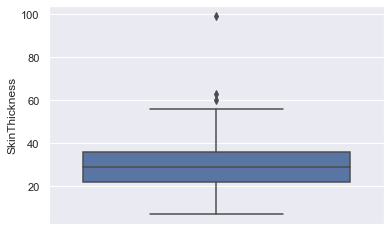

In [8]:
sns.boxplot(y = 'SkinThickness', data = data)

In [9]:
data['SkinThickness'].mean(), data['SkinThickness'].median() 

(29.153419593345657, 29.0)

In [10]:
data['SkinThickness'] = data['SkinThickness'].fillna(data['SkinThickness'].median())
# data.isnull().sum()

In [11]:
data['Insulin'].mean(), data['Insulin'].median() 

(155.5482233502538, 125.0)

In [12]:
data['Insulin'] = data['Insulin'].fillna(data['Insulin'].median())
# data.isnull().sum()

In [13]:
data['BMI'].mean(), data['BMI'].median() 

(32.457463672391015, 32.3)

In [14]:
data['BMI'] = data['BMI'].fillna(data['BMI'].median())
# data.isnull().sum()

In [13]:
for i in range(9):
    print(data.columns[i])

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome


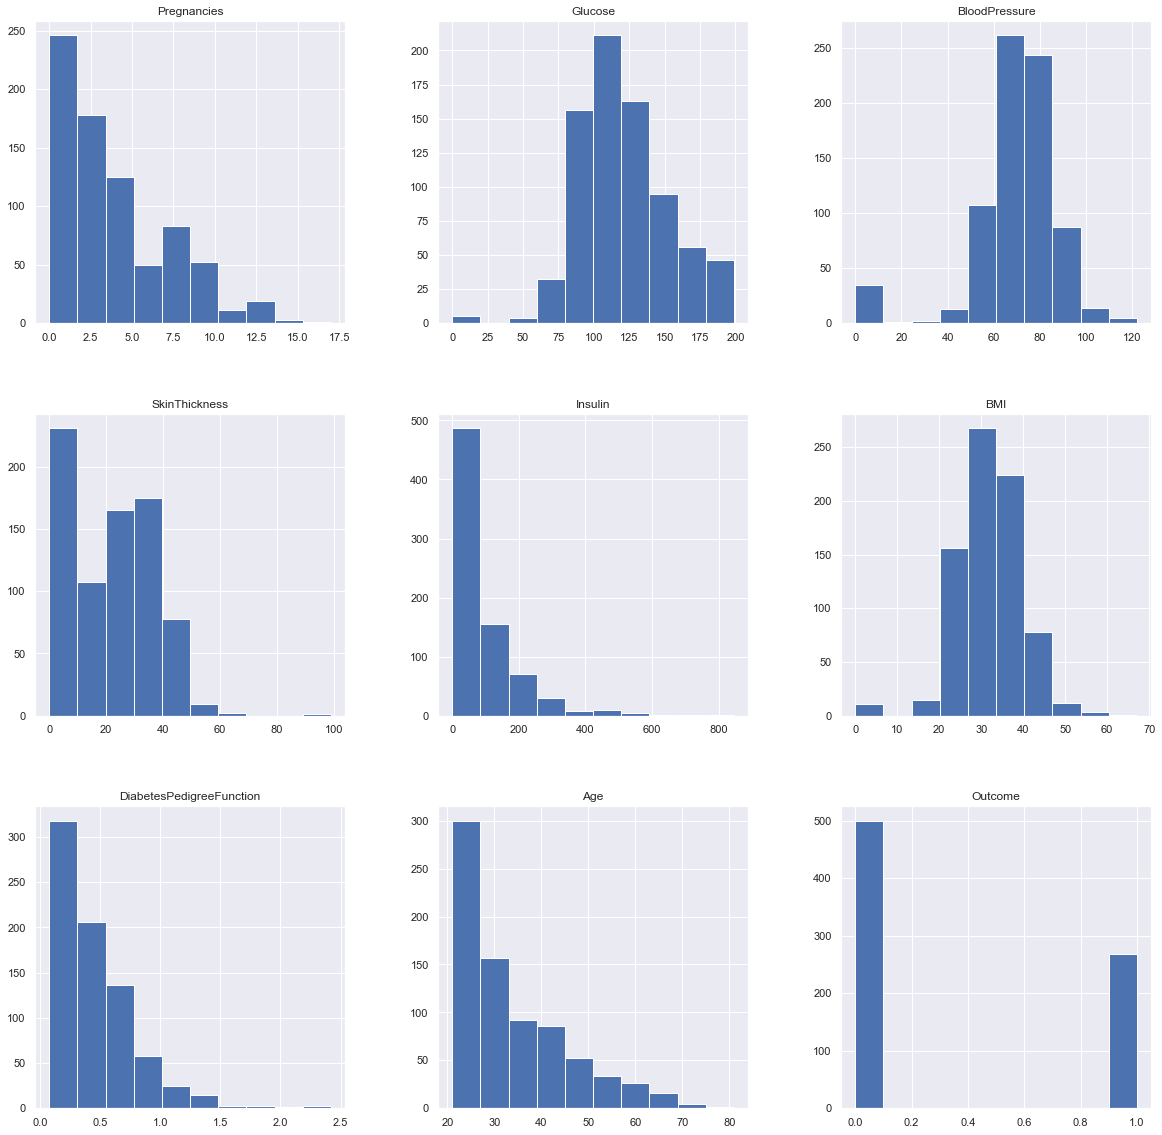

In [14]:
# for feature in data.columns:
#     plt.hist(data[feature])
#     plt.title(feature)
#     plt.show()
p = data.hist(figsize = (20,20))

**Pair Plot to see Distribution of all data at a time and dependencies**

C:\Users\AKASH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\AKASH\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\AKASH\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


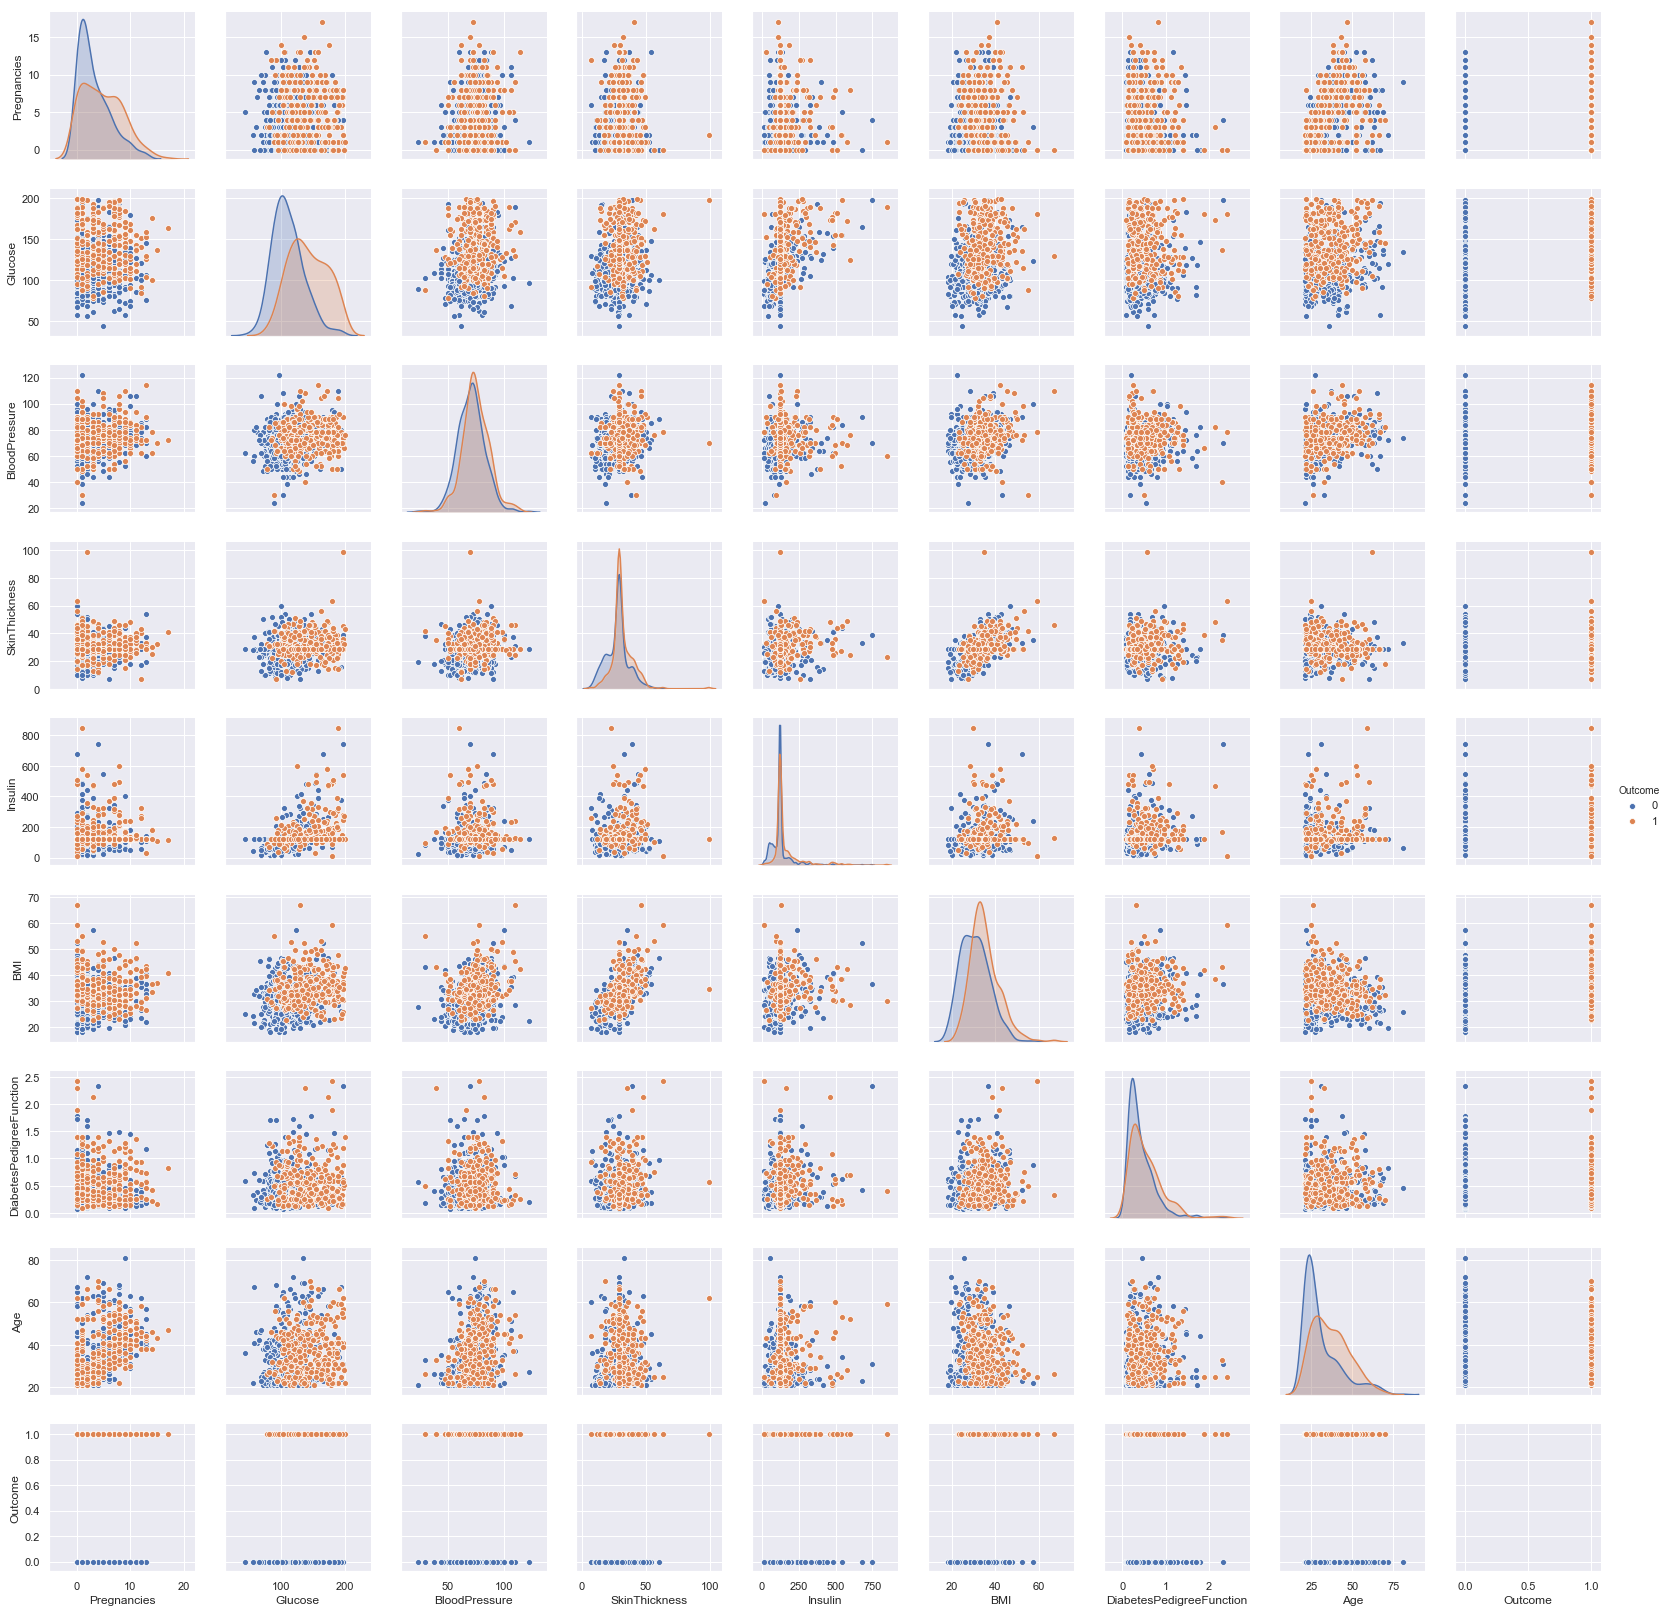

In [25]:
sns.pairplot(data =data, hue = 'Outcome')
plt.show()

**Heat Map**\
\
Gives Relation of different attribute with each other

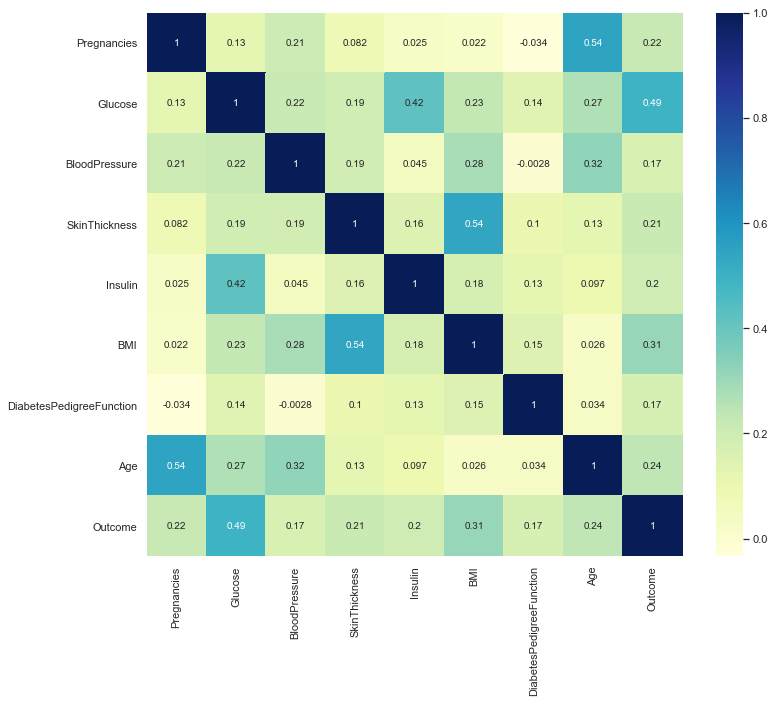

In [26]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot = True, cmap = "YlGnBu")
plt.show()

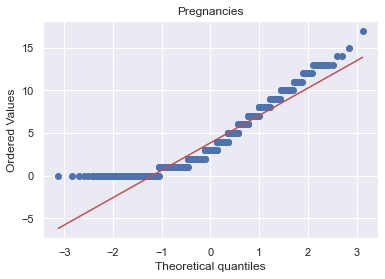

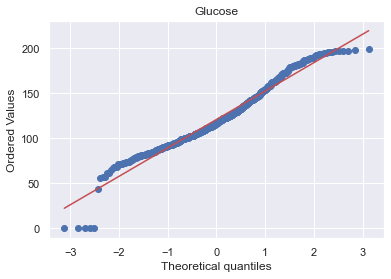

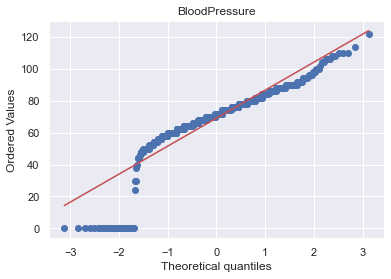

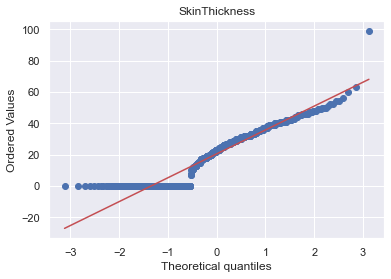

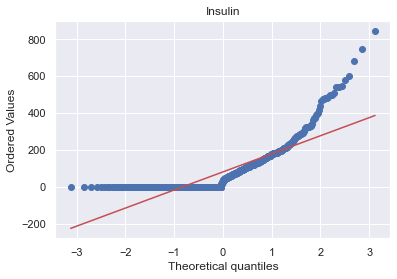

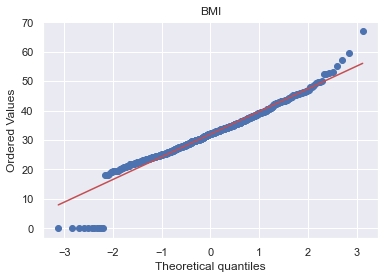

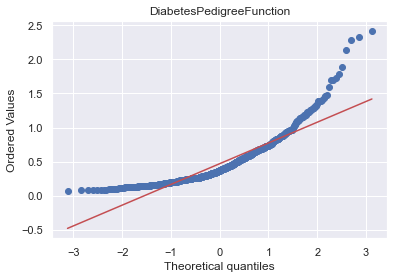

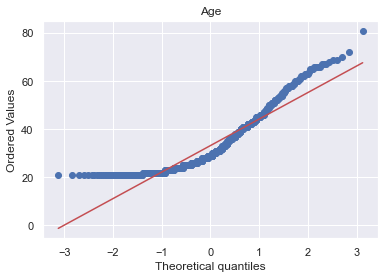

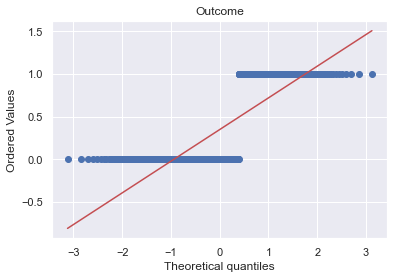

In [15]:
from scipy import stats
for feature in data.columns:
    stats.probplot(data[feature], plot = plt)
    plt.title(feature)
    plt.show()

---

## Standardizing Data

In [15]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [16]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [17]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [18]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [19]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [20]:
# X[:] = scale.fit_transform(X[:])

In [34]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


---

## Splitting data into train and test set

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

---

## Fitting data in various models

In [52]:
def svm_classifier(X_train, X_test, y_train, y_test):

    classifier_svm = SVC(kernel = 'rbf', random_state = 0)
    classifier_svm.fit(X_train, y_train)

    y_pred = classifier_svm.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    filename = 'svm_model.pkl'
    pickle.dump(classifier_svm, open(filename, 'wb'))

    return print(f"Train score : {classifier_svm.score(X_train, y_train)}\nTest score : {classifier_svm.score(X_test, y_test)}")
#     print("-"*100)
#     print(cm)

In [53]:

def knn_classifier(X_train, X_test, y_train, y_test):
    
    classifier_knn = KNeighborsClassifier(metric = 'minkowski', p = 2)
    classifier_knn.fit(X_train, y_train)

    y_pred = classifier_knn.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    filename = 'knn_model.pkl'
    pickle.dump(classifier_knn, open(filename, 'wb'))
    return print(f"Train score : {classifier_knn.score(X_train, y_train)}\nTest score : {classifier_knn.score(X_test, y_test)}")
#     print("-"*100)
#     print(cm)

In [24]:

def naive_classifier(X_train, X_test, y_train, y_test):
    
    classifier_naive = GaussianNB()
    classifier_naive.fit(X_train, y_train)

    y_pred = classifier_naive.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_naive.score(X_train, y_train)}\nTest score : {classifier_naive.score(X_test, y_test)}")
#     print("-"*100)
#     print(cm)

In [54]:

def tree_classifier(X_train, X_test, y_train, y_test):
    
    classifier_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    classifier_tree.fit(X_train, y_train)

    y_pred = classifier_tree.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    filename = 'tree_model.pkl'
    pickle.dump(classifier_tree, open(filename, 'wb'))
    return print(f"Train score : {classifier_tree.score(X_train, y_train)}\nTest score : {classifier_tree.score(X_test, y_test)}")
#     print("-"*100)
#     print(cm)

In [27]:

def forest_classifier(X_train, X_test, y_train, y_test):
    classifier_forest = RandomForestClassifier(criterion = 'entropy', random_state = 0)
    classifier_forest.fit(X_train, y_train)

    y_pred = classifier_forest.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_forest.score(X_train, y_train)}\nTest score : {classifier_forest.score(X_test, y_test)}")
#     print("-"*100)
#     print(cm)

In [55]:

def print_score(X_train, X_test, y_train, y_test):
    print("SVM:\n")
    svm_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    print("KNN:\n")
    knn_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    print("Naive:\n")
    naive_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    print("Decision Tree:\n")
    tree_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    print("Random Forest:\n")
    forest_classifier(X_train, X_test, y_train, y_test)


In [56]:
print_score(X_train, X_test, y_train, y_test)

SVM:

Train score : 0.758957654723127
Test score : 0.7922077922077922
----------------------------------------------------------------------------------------------------

KNN:

Train score : 0.8013029315960912
Test score : 0.7662337662337663
----------------------------------------------------------------------------------------------------

Naive:

Train score : 0.745928338762215
Test score : 0.7857142857142857
----------------------------------------------------------------------------------------------------

Decision Tree:

Train score : 1.0
Test score : 0.6883116883116883
----------------------------------------------------------------------------------------------------

Random Forest:

Train score : 1.0
Test score : 0.8116883116883117


---

## Performance Metrics

In [31]:
classifier_forest = RandomForestClassifier(criterion = 'entropy')
classifier_forest.fit(X_train, y_train)
y_pred = classifier_forest.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[93, 14],
       [16, 31]])

In [44]:
# classifier_svm = SVC(kernel = 'rbf', random_state = 0, probability=True)
# classifier_svm.fit(X_train, y_train)
# y_pred = classifier_svm.predict(X_test)

# cm = confusion_matrix(y_test, y_pred)
# cm

In [32]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,93,14,107
1,16,31,47
All,109,45,154


**Checking data is balanced or not**

In [33]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

**Classification Report (Accuracy, Precision, Recall, F1-score)**

In [34]:
from sklearn.metrics import roc_auc_score, roc_curve, classification_report

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       107
           1       0.69      0.66      0.67        47

    accuracy                           0.81       154
   macro avg       0.77      0.76      0.77       154
weighted avg       0.80      0.81      0.80       154



**Getting probability instead of A/B test**

In [36]:
y_pred_prob = classifier_forest.predict_proba(X_test)[:,1]
y_pred_prob

array([0.87, 0.14, 0.03, 0.56, 0.07, 0.01, 0.81, 0.79, 0.44, 0.4 , 0.76,
       0.79, 0.14, 0.2 , 0.31, 0.62, 0.84, 0.04, 0.49, 0.23, 0.65, 0.09,
       0.11, 0.25, 0.02, 0.42, 0.04, 0.87, 0.01, 0.1 , 0.41, 0.23, 0.18,
       0.65, 0.06, 0.71, 0.44, 0.03, 0.27, 0.67, 0.21, 0.14, 0.17, 0.83,
       0.66, 0.06, 0.04, 0.05, 0.32, 0.23, 0.4 , 0.12, 0.8 , 0.58, 0.26,
       0.04, 0.15, 0.43, 0.37, 0.55, 0.72, 0.69, 0.02, 0.68, 0.9 , 0.5 ,
       0.69, 0.08, 0.56, 0.26, 0.05, 0.24, 0.08, 0.78, 0.92, 0.43, 0.22,
       0.68, 0.35, 0.22, 0.42, 0.39, 0.15, 0.01, 0.17, 0.24, 0.13, 0.33,
       0.89, 0.15, 0.32, 0.26, 0.17, 0.03, 0.64, 0.09, 0.31, 0.37, 0.38,
       0.59, 0.21, 0.02, 0.15, 0.  , 0.63, 0.67, 0.1 , 0.57, 0.05, 0.52,
       0.03, 0.51, 0.5 , 0.62, 0.73, 0.63, 0.15, 0.43, 0.15, 0.81, 0.43,
       0.3 , 0.16, 0.26, 0.04, 0.  , 0.32, 0.4 , 0.36, 0.44, 0.51, 0.37,
       0.03, 0.75, 0.24, 0.57, 0.23, 0.64, 0.46, 0.2 , 0.03, 0.76, 0.  ,
       0.11, 0.68, 0.  , 0.06, 0.09, 0.11, 0.29, 0.

**Evaluating FPR, TPR, Threshold**

In [50]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
print("FPR:\n\n", fpr)


print("-"*100)

print("TPR:\n\n", tpr)

FPR:

 [0.         0.00934579 0.01869159 0.05607477 0.12149533 0.22429907
 0.31775701 0.38317757 0.51401869 0.6728972  1.        ]
----------------------------------------------------------------------------------------------------
TPR:

 [0.         0.12765957 0.19148936 0.40425532 0.5106383  0.63829787
 0.76595745 0.85106383 0.91489362 0.9787234  1.        ]


**Plotting ROC Curve**

NameError: name 'fpr' is not defined

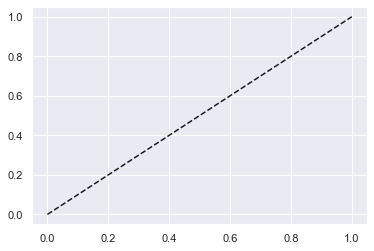

In [37]:
plt.plot([0, 1], [0, 1], "k--", label = '50% AUC')
plt.plot(fpr, tpr, label = "Random Forest")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve - Random Forest")
plt.show()

**ROC Score**

In [52]:
roc_auc_score(y_test,y_pred_prob)

0.8103002585006959

---

## Hyperparameter Tunning

In [38]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_forest, X = X_train, y = y_train, cv = 10)
print(accuracies.mean(), accuracies.std())

0.7556848228450556 0.05244584753084032


In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
parameters = {
    'n_estimators': [25, 50, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [14, 20, 25, 30]
}

In [41]:
grid_search = GridSearchCV(estimator = classifier_forest,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
print('best_accuracy = ',grid_search.best_score_)
print('best_parameters = ', grid_search.best_params_)

best_accuracy =  0.7621893178212586
best_parameters =  {'criterion': 'entropy', 'max_depth': 14, 'n_estimators': 25}


In [57]:
classifier_forest = RandomForestClassifier(criterion = 'gini', max_depth = 25, n_estimators = 200, random_state = 0)
classifier_forest.fit(X_train, y_train)
y_pred = classifier_forest.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[94, 13],
       [13, 34]], dtype=int64)

In [58]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.88      0.88      0.88       107
          1       0.72      0.72      0.72        47

avg / total       0.83      0.83      0.83       154



---

## Saving model using pickle

In [30]:
filename = 'knn_model.pkl'
pickle.dump(knn_classifier, open(filename, 'wb'))

In [49]:
filename = 'tree_model.pkl'
pickle.dump([tree_classifier], open(filename, 'wb'), -1)

In [ ]:
filename = 'tree_model.pkl'
pickle.dump(classifier_tree, open(filename, 'wb'))

In [59]:
filename = 'diabetes_model.pkl'
pickle.dump(classifier_forest, open(filename, 'wb'))

In [46]:
model = open('diabetes_model.pkl','rb')
forest = pickle.load(model)

In [51]:
model = open('tree_model.pkl','rb')
tree = pickle.load(model)

In [61]:
y_pred = forest.predict(X_test)

In [62]:
confusion_matrix(y_test, y_pred)

array([[94, 13],
       [13, 34]], dtype=int64)